In [134]:
#1. Read the column description and ensure you understand each attribute well


#2. Study the data distribution in each attribute, share your findings. (10 points)


#3. Get the target column distribution. 


#4. Split the data into training and test set in the ratio of 70:30 respectively


#5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a
#liability customer buying personal loans (30 points)


#6. Print the confusion matrix for all the above models (10 points)


#7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

 

In [135]:

#colnames = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage','Personal Loan','Securities Account','CD account','online','Credit']

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
warnings.simplefilter("ignore")

In [137]:
Bank_df=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [138]:
Bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [139]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [140]:
Bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [141]:
Bank_df['CCAvg']=Bank_df['CCAvg'].astype(float).astype(int)

In [142]:
Bank_df.dtypes

ID                    int64
Age                   int64
Experience            int64
Income                int64
ZIP Code              int64
Family                int64
CCAvg                 int32
Education             int64
Mortgage              int64
Personal Loan         int64
Securities Account    int64
CD Account            int64
Online                int64
CreditCard            int64
dtype: object

In [143]:
Bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1,2,0,0,0,0,0,1


In [144]:
Bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.3384,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.7742,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.5138,1.741728,0.0,0.00,1.0,2.00,10.0
Education,5000.0,1.8810,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.00,0.0,0.00,1.0


In [145]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [146]:
Bank_df['number']=Bank_df.index

In [147]:
Bank_df.set_index('number',inplace=True)

In [148]:
Bank_df.isnull().sum().sum()

0

In [149]:
Bank_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [150]:
Bank_df.groupby(["number"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
number,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [151]:
Bank_df[~Bank_df.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
number,,,,,,,,,,,,,,


In [152]:
Bank_df = Bank_df.fillna(Bank_df.median())
Bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
number,,,,,,,,,,,,,,
0,1,25,1,49,91107,4,1,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0,2,104,0,0,0,1,0


In [153]:
Bank_df.groupby(["ID"]).count()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1


In [154]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
Bank_df.apply(le.fit_transform)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
number,,,,,,,,,,,,,,
0,0,2,4,33,83,3,1,0,0,0,1,0,0,0
1,1,22,22,22,34,2,1,0,0,0,1,0,0,0
2,2,16,18,3,367,0,1,0,0,0,0,0,0,0
3,3,12,12,74,298,0,2,1,0,0,0,0,0,0
4,4,12,11,31,96,3,1,1,0,0,0,0,0,1
5,5,14,16,17,160,3,0,1,81,0,0,0,1,0
6,6,30,30,52,115,1,1,1,0,0,0,0,1,0
7,7,27,27,12,267,0,0,2,0,0,0,0,0,1
8,8,12,13,59,34,2,0,1,30,0,0,0,1,0


In [155]:
Bank_df['Experience']=Bank_df['Experience'].abs()

In [156]:
Bank_df[Bank_df['Experience']>=0].count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [157]:
array = Bank_df.values
X = array[:,0:7]
Y = array[:,8]  
test_size = 0.30 
seed = 7  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)
X

array([[    1,    25,     1, ..., 91107,     4,     1],
       [    2,    45,    19, ..., 90089,     3,     1],
       [    3,    39,    15, ..., 94720,     1,     1],
       ...,
       [ 4998,    63,    39, ..., 93023,     2,     0],
       [ 4999,    65,    40, ..., 90034,     3,     0],
       [ 5000,    28,     4, ..., 92612,     3,     0]], dtype=int64)

In [158]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7033333333333334
[[1055    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]
 [   3    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


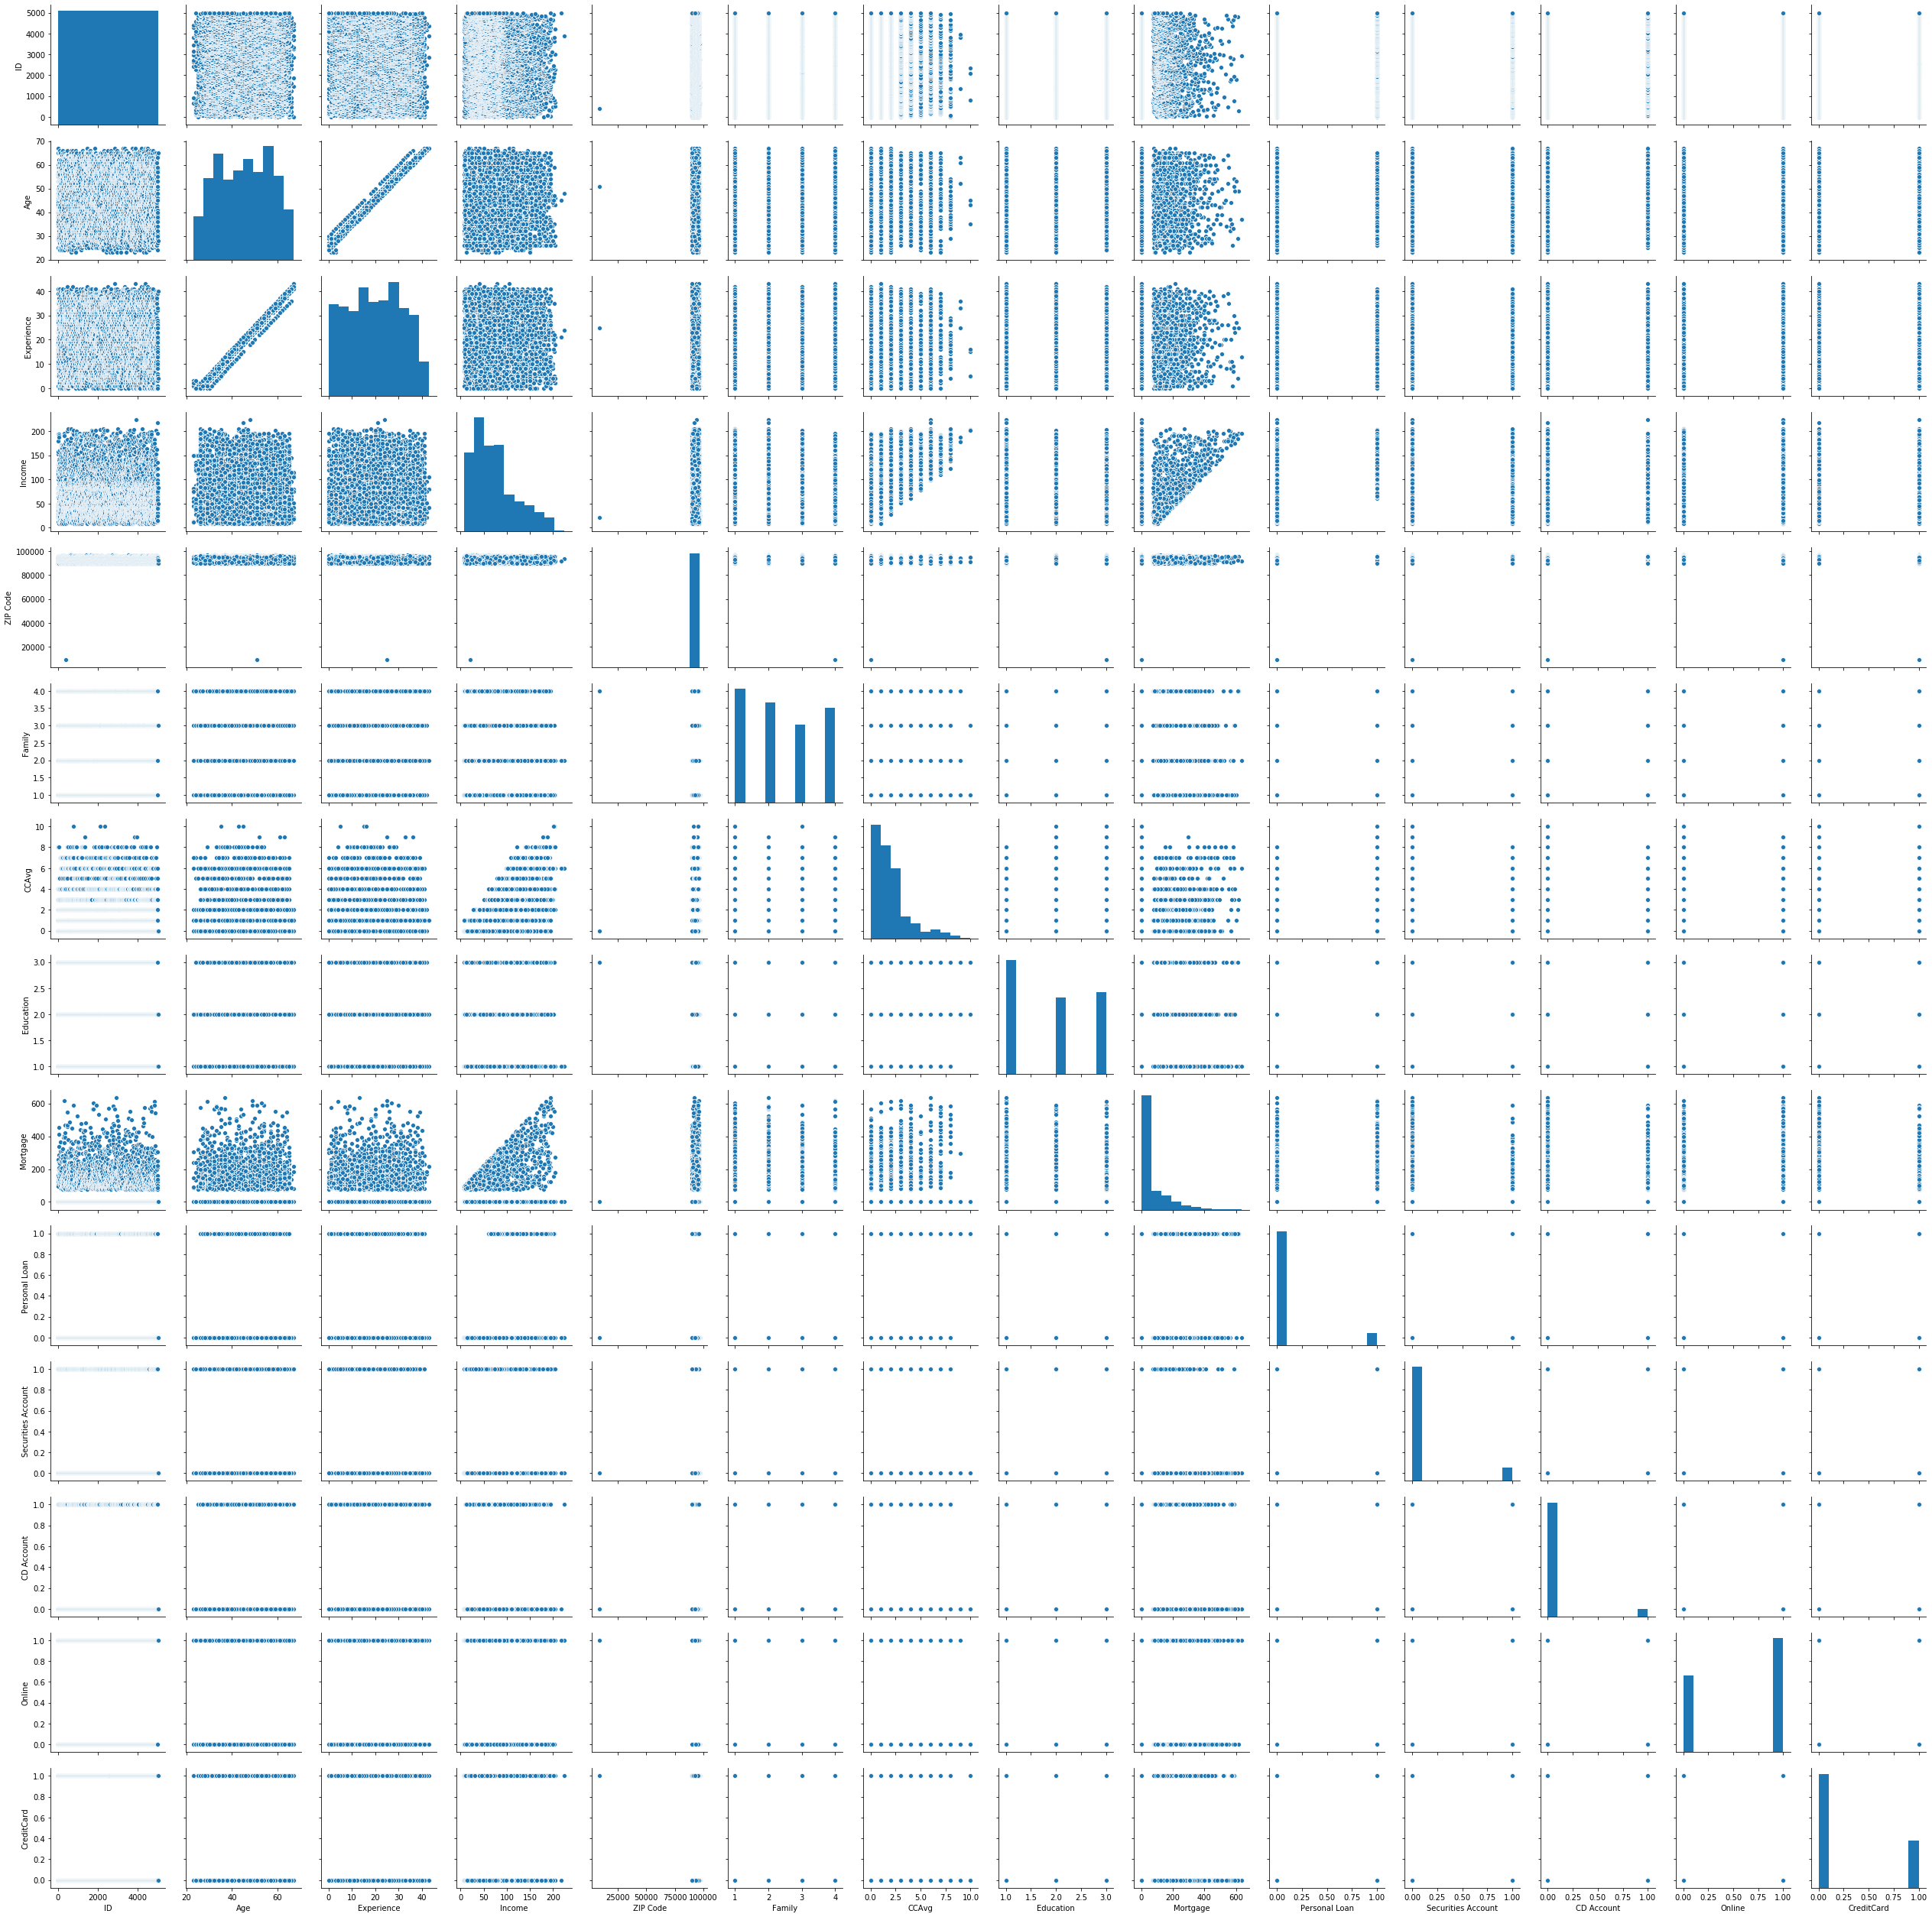

In [159]:
sns.pairplot(Bank_df)

In [160]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [161]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)

0.7033333333333334


In [162]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1055    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]
 [   3    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


In [163]:
Bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
number,,,,,,,,,,,,,,
0,1,25,1,49,91107,4,1,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1,2,0,0,0,0,0,1


In [164]:
Y=Bank_df.values[:,8]
X=Bank_df.values[:,0:7]

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [165]:
dta = Bank_df[['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage','Personal Loan','Securities Account','CD account','online','Credit']].copy()
dta
endog = dta['ID']
formula = 'endog ~ ID + Age + Experience + Income + ZIPCode + Family + CCAvg + Education + Mortgage +Personal Loan + Securities Account + CD account + online + Credit
logit1=smf.glm(formula=formula,data=dta,family=sm.families.Binomial()).fit()
#logit1.params
print(logit1.summary())

SyntaxError: EOL while scanning string literal (<ipython-input-165-f1e2fee7aa0c>, line 4)

In [166]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [167]:
Bank_labels = Bank_df["ID"]

In [179]:
Bank_feature_df = Bank_df
Bank_feature_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
number,,,,,,,,,,,,,,
0,1,25,1,49,91107,4,1,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1,2,0,0,0,0,0,1


In [180]:
Bank_feature_df_z = Bank_feature_df.apply(zscore)  # convert all attributes to Z scale 

Bank_feature_df_z.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-2.047251e-17,2.478018e-17,1.001421e-16,1.939449e-16,1.513445e-15,7.850609e-16,4.047873e-16,-6.315837e-16,2.810197e-16,-5.565326e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.731704e+00,-1.948906e+00,-1.764019e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-8.692238e-01,-1.049078e+00,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-8.658522e-01,-9.019702e-01,-8.879059e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-8.692238e-01,-1.049078e+00,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,0.000000e+00,-2.952359e-02,-1.179249e-02,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.950239e-01,1.417029e-01,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.658522e-01,8.429230e-01,8.643209e-01,5.263146e-01,6.860245e-01,5.259909e-01,2.791760e-01,1.332484e+00,4.375576e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.731704e+00,1.889859e+00,2.003268e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.872775e+00,1.332484e+00,5.688108e+00,3.068659e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [181]:
Bank_labels = Bank_df["ID"]

In [182]:
X = np.array(Bank_feature_df_z)
X.shape

(5000, 14)

In [183]:
y = np.array(Bank_labels)
y.shape

(5000,)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [185]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [190]:
predicted_labels = NNH.predict(X_train)
NNH.score(X_train, y_train)

1.0

In [191]:
from sklearn import metrics

print(metrics.confusion_matrix(y_train, predicted_labels))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


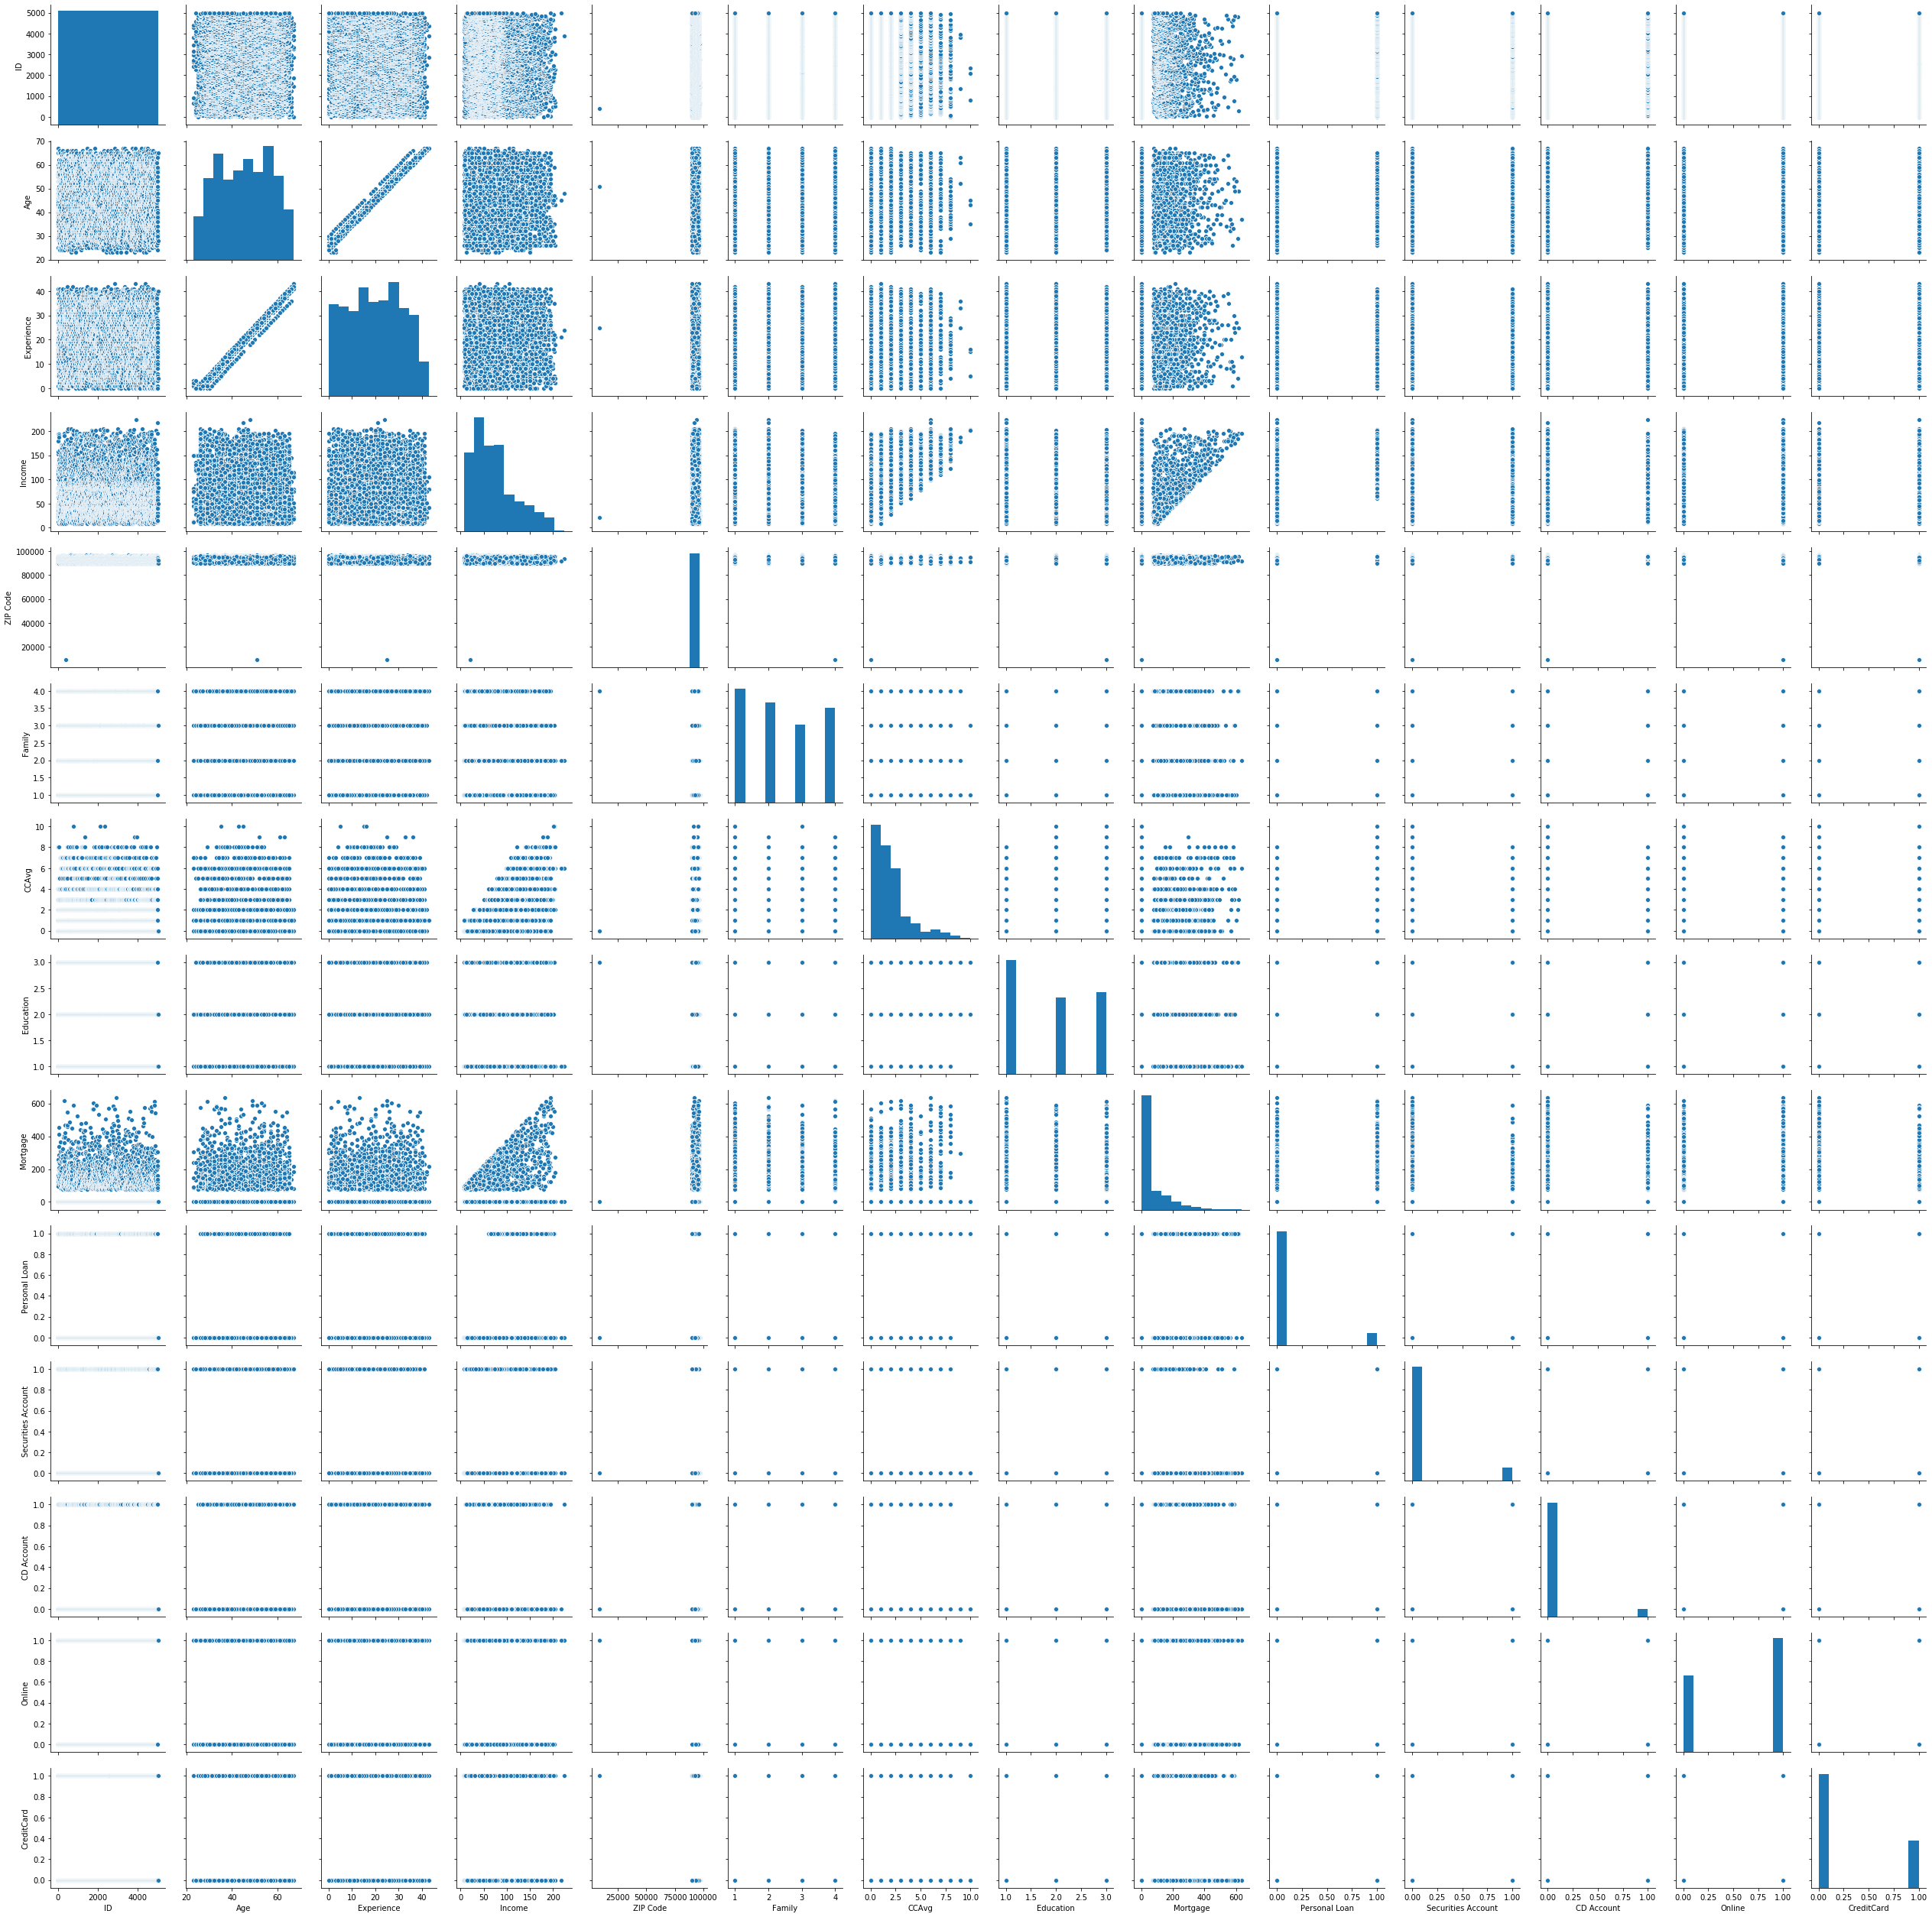

In [192]:
sns.pairplot(Bank_df)

In [193]:
array = Bank_df.values

In [196]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
X = array[:,0:7]
Y = array[:,8]

In [197]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [198]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [200]:
expected = y_train
predicted = model.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76      2407
          75       0.00      0.00      0.00         6
          76       0.00      0.00      0.00         9
          77       0.40      1.00      0.57         2
          78       0.00      0.00      0.00        10
          79       0.00      0.00      0.00         7
          80       0.33      1.00      0.50         2
          81       0.00      0.00      0.00         8
          82       0.00      0.00      0.00         6
          83       0.00      0.00      0.00        16
          84       0.00      0.00      0.00         8
          85       0.00      0.00      0.00         6
          86       0.00      0.00      0.00         9
          87       0.00      0.00      0.00        10
          88       0.00      0.00      0.00         7
          89       0.00      0.00      0.00        14
          90       0.00      0.00      0.00        12
          91       0.00    

In [ ]:
Logistic regression 0.7 accuracy, KNN 1.0 Accuracy,Naive Bayes 0.6 accuracy.So KNN is the best model for in this case which performs better